## Lab 4 - Hypothesis testing and statistical analysis

Please read this to the end before starting. There is important information towards the end.

## Get the data (1 mark)

The data is in /usr/info/courses/COMP13212/census11sample.csv. Read it in to a dataframe.

This data consists of samples of ages from the 2011 census in England for different regions. Each data point is the age at the last birthday of an individual. So, a zero is a person who has not reached their first birthday, a 35 is a person who is 35 years old, and so on. The exception is that the age 100 really means between 100 and 114. Apparently, the Office for National Statistics filtered out everyone over 114. There is a sample of 1000 individual ages for each of nine regions. The data is derived from the Office for National Statistics: 2011 Census aggregate data. UK Data Service (Edition: February 2017). DOI: http://dx.doi.org/10.5257/census/aggregate-2011-2, but was taken from the InFuse website, http://infuse2011.ukdataservice.ac.uk. The samples were sampled from this data by Jonathan Shapiro.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
from scipy import stats
import numpy as np

sns.set_style('white')
%matplotlib inline
db = pd.read_csv('census11sample.csv', index_col=0)
db

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
...,...,...,...,...,...,...,...,...,...
995,42,59,47,37,61,67,29,16,21
996,49,45,16,80,87,86,4,79,74
997,31,5,25,39,52,22,17,8,34
998,38,69,52,4,3,76,24,51,94


## Divide the data (2 marks)

You are going to explore this data and from your explorations devise a hypothesis to test. Once you generate a hypothesis, you need a fresh set of data on which to test it. If you use the same data, it is biased in favor of your hypothesis. So, split the data in to two parts, a set for exploration and hythesis generation, and a set on which to test the hypothesis. In what follows, I will call the two sets: sample_explore and sample_test. (You can call them whatever you want.)

In [3]:
db_explore = db[:500]
db_test = db[500:]
db_explore

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
...,...,...,...,...,...,...,...,...,...
495,27,37,30,65,21,20,43,62,48
496,63,39,76,57,47,77,56,64,68
497,62,26,21,69,14,53,3,65,19
498,15,68,4,63,44,7,23,36,8


In [4]:
db_test

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
500,38,77,14,27,31,6,15,67,58
501,58,19,62,53,3,23,37,9,60
502,11,14,51,24,32,31,28,73,53
503,53,50,44,80,1,62,39,5,80
504,55,66,44,84,67,42,26,45,3
...,...,...,...,...,...,...,...,...,...
995,42,59,47,37,61,67,29,16,21
996,49,45,16,80,87,86,4,79,74
997,31,5,25,39,52,22,17,8,34
998,38,69,52,4,3,76,24,51,94


## Explore the data (5 marks)

Explore dataset sample_explore. Measure descriptive statistics, plot histograms, scatterplots, and whatever. Find something interesting in the data, and generate a hypothesis about it. Remember, a hypothesis is a statement which is true or false, and can be falsefied.  

In [4]:
db_explore.describe()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,41.120000,39.530000,38.492000,38.76000,40.582000,42.104000,35.07400,41.198000,43.42800
std,22.662409,23.727095,22.468101,23.71876,23.638037,24.282514,22.37834,23.157533,24.03948
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,23.000000,19.000000,21.000000,18.00000,20.000000,22.000000,17.00000,23.000000,23.00000
50%,42.000000,40.000000,37.000000,37.00000,42.000000,41.000000,33.50000,42.000000,44.00000
75%,58.000000,57.000000,54.000000,59.00000,59.000000,62.000000,51.00000,60.000000,61.00000
max,90.000000,98.000000,94.000000,90.00000,96.000000,97.000000,96.00000,92.000000,98.00000


(30.0, 45.0)

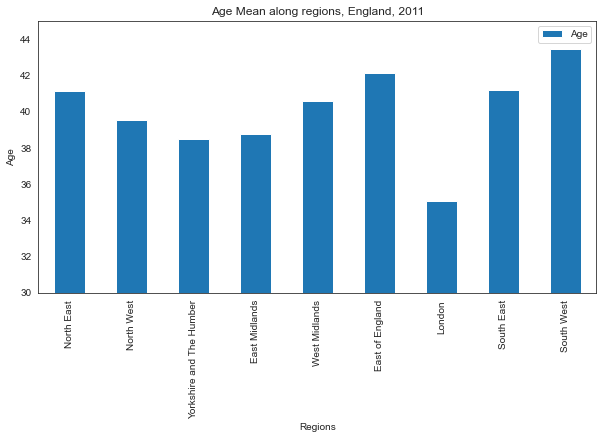

In [5]:
mean_df = pd.DataFrame(db_explore.mean().to_dict(),index=[db_explore.index.values[-1]] )
mean_df = mean_df.rename(index={499:'Age'})
mean_df = mean_df.transpose()
ax = mean_df.plot.bar(rot=90, figsize = (10, 5), title="Age Mean along regions, England, 2011", ylabel = 'Age', xlabel='Regions')
ax.set_ylim(30, 45)

<AxesSubplot:title={'center':'Age frequency in South West'}, ylabel='Frequency'>

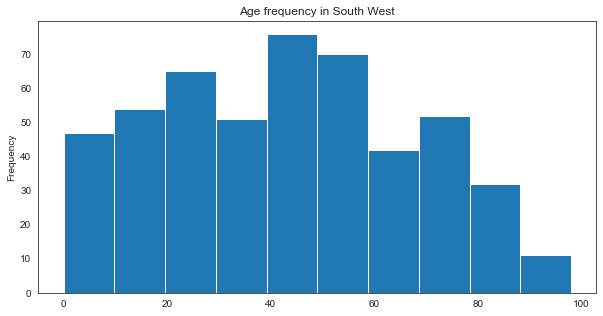

In [25]:
db_explore['South West'].plot(kind="hist", figsize=(10,5), title="Age frequency in South West")


<AxesSubplot:title={'center':'Age frequency in London'}, ylabel='Frequency'>

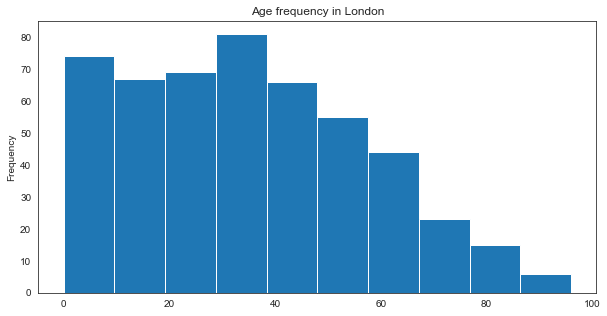

In [24]:
db_explore['London'].plot(kind="hist", figsize=(10,5), title="Age frequency in London")

<AxesSubplot:title={'center':'Age frequency of West England'}, ylabel='Frequency'>

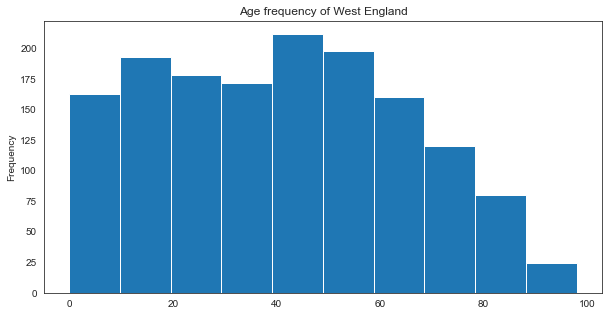

In [27]:
db_west = pd.concat([db_explore['North West'], db_explore['West Midlands'], db_explore['South West']])
db_west.plot(kind="hist", figsize=(10,5) , title="Age frequency of West England")

<AxesSubplot:title={'center':'Age frequency in East England'}, ylabel='Frequency'>

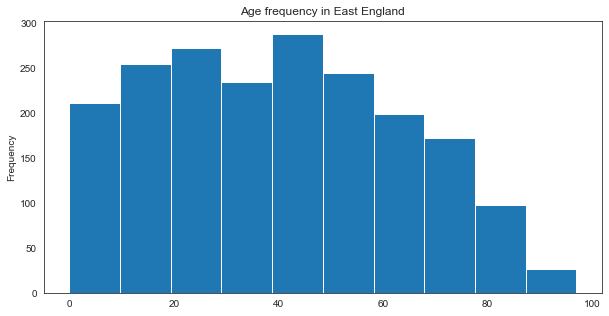

In [28]:
db_east = pd.concat([db_explore['North East'], db_explore['Yorkshire and The Humber'], db_explore['East Midlands'], db_explore['East of England']])
db_east.plot(kind="hist", figsize=(10,5), title="Age frequency in East England")

(30.0, 45.0)

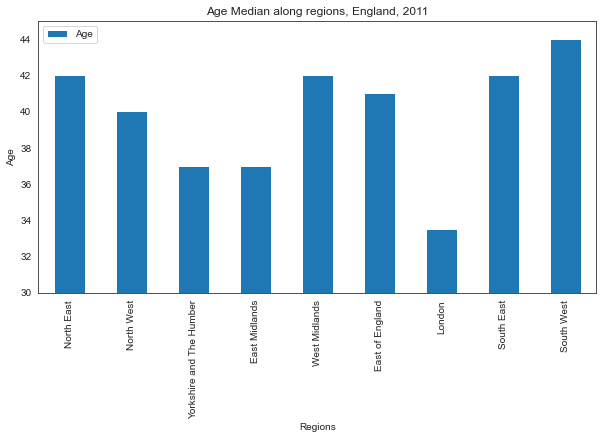

In [10]:
median_df = pd.DataFrame(db_explore.median().to_dict(),index=[db_explore.index.values[-1]] )
median_df = median_df.rename(index={499:'Age'})
median_df = median_df.transpose()
ax = median_df.plot.bar(rot=90, figsize = (10, 5), title="Age Median along regions, England, 2011", ylabel = 'Age', xlabel='Regions')
ax.set_ylim(30,45)

   London   West    East
0  35.074  41.18  40.119


(30.0, 45.0)

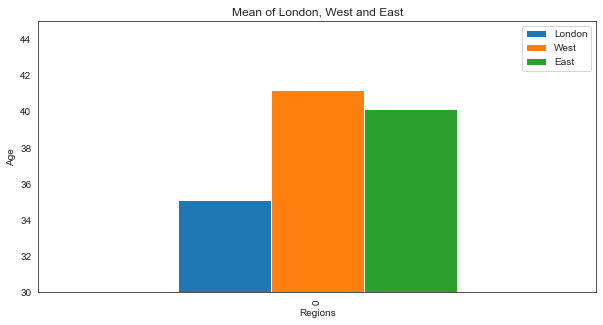

In [31]:
mean_of_west = db_west.mean()
mean_of_east = db_east.mean()
mean_of_London = db_explore['London'].mean()
regions_data1 = {'London':mean_of_London, 'West':mean_of_west, 'East':mean_of_east}
db_regions_mean = pd.DataFrame(data = regions_data1, index = [0])
print(db_regions_mean)
ax2 = db_regions_mean.plot.bar(rot=90, figsize = (10, 5), title="Mean of London, West and East", ylabel = 'Age', xlabel='Regions')
ax2.set_ylim(30,45)

   London  West  East
0  35.074  42.0  40.0


(30.0, 45.0)

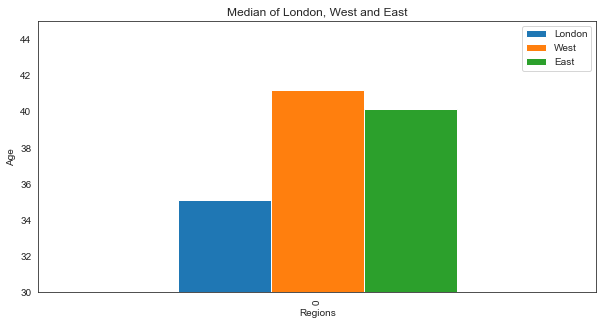

In [32]:
median_of_west = db_west.median()
median_of_east = db_east.median()
median_of_London = db_explore['London'].mean()
regions_data2 = {'London':median_of_London, 'West':median_of_west, 'East':median_of_east}
db_regions_median = pd.DataFrame(data = regions_data2, index = [0])
print(db_regions_median)
ax3 = db_regions_mean.plot.bar(rot=90, figsize = (10, 5), title="Median of London, West and East", ylabel = 'Age', xlabel='Regions')
ax3.set_ylim(30,45)

## State your hypothesis, and state the evidence that justifies it. (2 marks)

<b>Null hypothesis:</b> London's mean age is not less compared to West and East England.<br>
<b>Alternative Hypothesis:</b> Mean age of London is less compared to all other parts of England. Evidence may be seen in the above bar charts and histograms where the mean and median for London are less from Eastern and Western regions' means and medians. The real life evidence may be the reason of London having the most numbers of Universities across England, being 18. Universities significantly increase the number of Young people aged from 18-25 which therefore makes London population young on average.


## Plan the test. (3 marks)

State how you plan to test the hypothesis briefly. State the null hypothesis and the probability level at which you will role it out (95%, 99%, etc.).

In order to test the hypothesis, I will carry out a z-test as I have more than 30 data points and have the standard deviation of my data. I will be using the two sample z-test formula. I will find the mean age of London and the mean age of all other regions together. Then in the the z-test formula I will use the standard deviation of London with the sample number of 500 as I have 500 people from London and I will be using the mean of the stnadard deviation of all other regions and the sample amount will be 4500 as in totatl I will have that many poeple from other parts of England. I will role out the hypothesis at 95%. As the alternative hypothesis states that the London mean should be less then the mean of other regions, this will be lower tail test.

## Perform the statistical test of the hypothesis. (5 marks)

You may do this using classical statistical methods, Bayesian methods, or, if you are uncomfortable with the notion that the data is normally distributed, you can use Monte Carlo (bootstrap) sampling. 

East_West mean:  40.078857142857146
London mean:  36.764
Z value:  -3.1761105471295927
Lower tail acceptance limit:  -1.6448536269514722


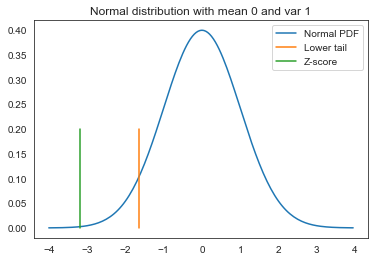

In [4]:
london_test_mean = db_test['London'].mean()##London mean age
db_east_west = pd.concat([db_test['North West'], db_test['West Midlands'], db_test['South West'], db_test['North East'], db_test['Yorkshire and The Humber'], db_test['East Midlands'], db_test['East of England']])
east_west_mean = db_east_west.mean()##All other egions mean age
print('East_West mean: ', east_west_mean)
print('London mean: ', london_test_mean)
est_wst_std = db_east_west.std().mean()##mean std from other regions
lndn_std = db_test['London'].std()## London std
z_score = ((london_test_mean-east_west_mean)/(math.sqrt(((lndn_std**2)/500) + ((est_wst_std**2)/4500))))
## z_score fo two sample test
print('Z value: ', z_score)

x=np.arange(-4,4,0.05)
y=norm.pdf(x,0,1)
plt.plot(x,y,label='Normal PDF')
plt.title('Normal distribution with mean 0 and var 1')
lower = stats.norm.ppf(1-0.95,0,1)

print('Lower tail acceptance limit: ', lower)
plt.plot([lower,lower],[0,0.2],label="Lower tail")
plt.plot([z_score,z_score],[0,0.2],label="Z-score")
plt.legend()
plt.show()

As we can see the z score is well in the acceptance interval meaning that the alternative hypothesis is accepted. As the mean of London was 36 and the mean of other regions was around 40, I did not make any type 1 or type 2 errors.

In [26]:
mean_non_atheletes = 61.33
mean_athletes = 66.33
sd_non_athletes = 15.4
sd_athletes = 13.6

num_non_athletes = 53073
num_athletes = 50420 

In [27]:
z_score = ((mean_non_atheletes-mean_athletes)/(math.sqrt(((sd_non_athletes**2)/num_non_athletes) + ((sd_athletes**2)/num_athletes))))

Z value:  -55.42928049529341
Lower tail acceptance limit:  -2.3263478740408408


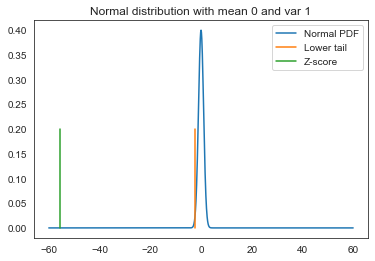

In [28]:
print('Z value: ', z_score)
x=np.arange(-60,60,0.05)
y=norm.pdf(x,0,1)
plt.plot(x,y,label='Normal PDF')
plt.title('Normal distribution with mean 0 and var 1')
lower = stats.norm.ppf(1-0.99,0,1)

print('Lower tail acceptance limit: ', lower)
plt.plot([lower,lower],[0,0.2],label="Lower tail")
plt.plot([z_score,z_score],[0,0.2],label="Z-score")
plt.legend()
plt.show()


## Conclusions. (2 Marks) 

Write out your conclusion completely, but in a single sentence. E.g. "Using the method of XXX, I find that the null hypothesis is/cannot be ruled out at Y percent level." 

Implementing z-test for the given scenario, I have found that the <b> null hypothesis  is ruled out at 95% </b>  level.

## What to submit.

You will submit a Jupyter Notebook/Lab to GitLab. The notebook needs to have the same headings as this document, but only up to the conclusions section. I.e. every section with a mark associated with it. Fill in each section with the appropriate text, code, measurements and graphics to perform the required tasks. You can start with this document, and fill it in. 

 ***

## Useful tools and commands.

### Z-test and t-test
For a z-test, you will need properties from the normal distribution. For a t-test, you will need properties of the Student-t distribution. There are many to get these in python. One way is to use `scipy.stats`. You can `from scipy import stats` which gives you all of stats, or just import the normal distribution, which is called norm - `from scipy.stats import norm`, or import the t-distribution, `from scipy.stats import t`. 

In [21]:
from scipy import stats

For all distributions in `scipy.stats`, the method `.pdf` gives the probability distribution, `.cdf` gives the cumulative distribution, `.ppf` gives an inverse of the cdf (very useful), and `.interval` gives a confidence interval. See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm.

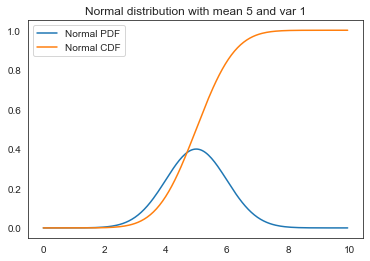

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0,10,0.05)
y=norm.pdf(x,5,1) # PDF of a normal distribution with mean 5 and variance 1
z=norm.cdf(x,5,1) # CDF of a normal distribution with mean 5 and variance 1
plt.plot(x,y,label='Normal PDF')
plt.plot(x,z,label='Normal CDF')
plt.legend()
plt.title('Normal distribution with mean 5 and var 1')
plt.show()

### Two-tailed test

The confidence interval is a function of $\alpha$ and is the smallest interval which contains $1-\alpha$ of the probability. For a two-tailed test, if the test statistic is outside the confidence interval, the null hypothesis is rejected; if it is inside the confidence interval, the null hypothesis is not rejected. All distributions in `scipy.stats` have a method `interval` which computes confidence interval.

The 95% confidence interval lies between 3.04 and 6.96.


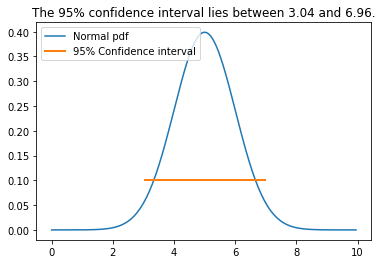

In [51]:
alpha = 0.05
x=np.arange(0,10,0.05)
y=stats.norm.pdf(x,5,1) # a normal distribution with mean 5 and variance 1
plt.plot(x,y,label='Normal pdf')
ci=stats.norm.interval(1-alpha,5,1)
print("The 95%% confidence interval lies between %3.2f and %3.2f." %(ci[0],ci[1]))
plt.plot([ci[0],ci[1]],[0.1,0.1],linewidth=2.0,label="95% Confidence interval")
plt.legend(loc=2)
plt.title("The 95%% confidence interval lies between %3.2f and %3.2f." %(ci[0],ci[1]))
plt.show()

### One tail test
Here is where `ppf` (the inverse of the cumulative distribution) is very useful. The lower tail critical value is where the cumulative distribution is equal to $\alpha$. The upper tail critical value is where the cumulative distribution is equal to $1-\alpha$. For a symmetric distribution (such as the normal or t distributions) the two critical values will be the same, but in general they will be different.

#### Lower tail and upper tail of a normal distribution with mean 5 and variance 1

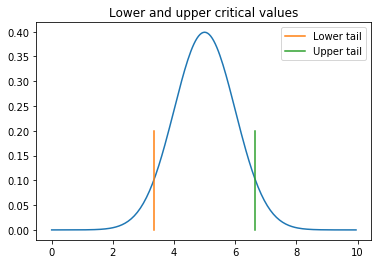

In [44]:
alpha = 0.05
lower = stats.norm.ppf(alpha,5,1)
upper = stats.norm.ppf(1-alpha,5,1)
plt.plot(x,y)
plt.plot([lower,lower],[0,0.2],label="Lower tail")
plt.plot([upper,upper],[0,0.2],label="Upper tail")
plt.legend()
plt.title("Lower and upper critical values")
plt.show()

The t-distribution works in a similar way, except the so-called "shape parameter" is the number of degrees of freedom, rather than the variance, and the location parameter (the mean) comes after the degrees of freedom.

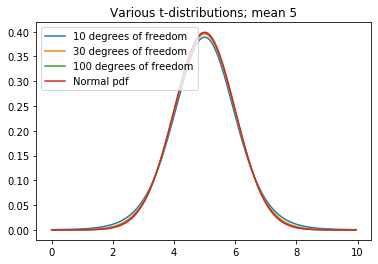

In [42]:
y10=stats.t.pdf(x,10,5)
y30=stats.t.pdf(x,30,5)
y100=stats.t.pdf(x,100,5)
plt.plot(x,y10,label="10 degrees of freedom")
plt.plot(x,y30,label="30 degrees of freedom")
plt.plot(x,y100,label="100 degrees of freedom")
plt.plot(x,y,label='Normal pdf')
plt.legend(loc=2)
plt.title("Various t-distributions; mean 5")
plt.show()

Notice how similar the t-distribution is to the normal distribution, even with the number of degrees of freedom as low as 10.

## Monte Carlo/Bootstrap sampling
If you want to do the statistics by generating samples from the data, you can use the method, `numpy.random.choice`. The first argument is the orginal data; the second argument is the size of the sample. The third argument is a boolean, determining with the sampling is with replacement or without replacement. By default, it does sampling with replacement, which is what you will need. 

In [47]:
a=[1,2,3,4,5]
b=np.random.choice(a,4)
c=np.random.choice(a,4,replace=False) # sample without replacement. replace=True by default.
print(b)
print(c)

[3 2 1 5]
[1 2 3 4]


# The end!